In [6]:
# Visualization Notebook: Motorbike Prices

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8')
sns.set_context('notebook')

DATA_DIR = Path('/Users/doananh/Documents/đồ án DS')
CLEAN_FILE = DATA_DIR / 'data_motobikes_clean.csv'
PLOT_DIR = DATA_DIR / 'plots'
PLOT_DIR.mkdir(exist_ok=True)

Df = pd.read_csv(CLEAN_FILE, low_memory=False)
print('Loaded cleaned shape:', Df.shape)

price = 'gia_vnd_final'
assert price in Df.columns, 'Missing gia_vnd_final. Run preprocess first.'


Loaded cleaned shape: (7208, 30)


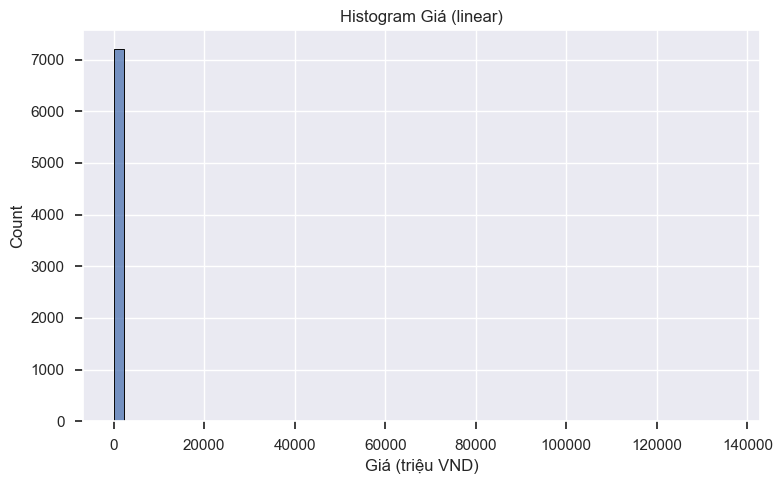

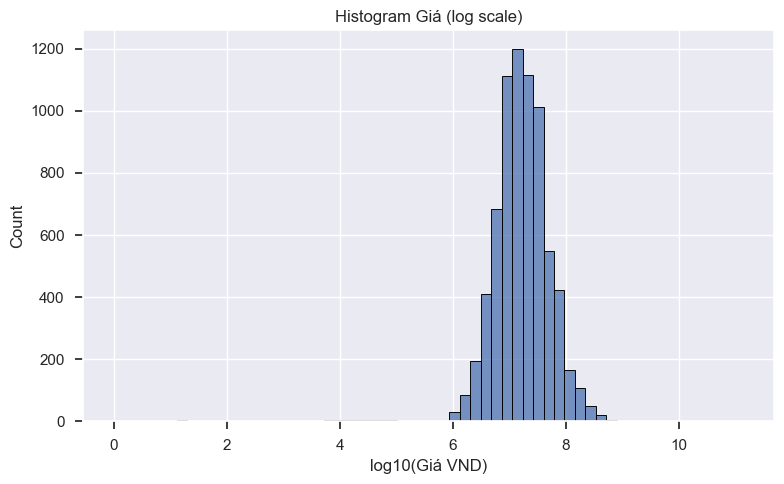

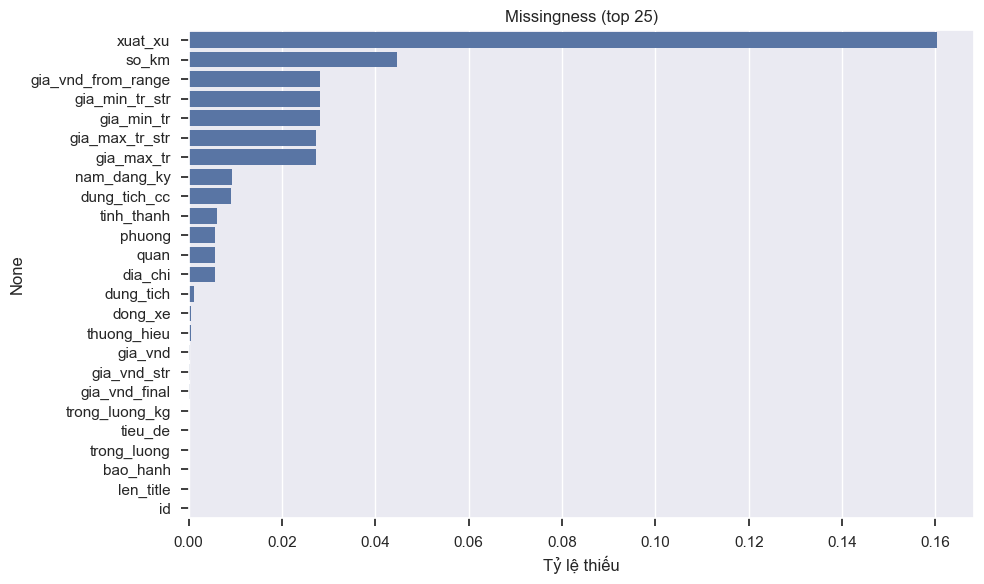

In [7]:
# Distributions and missingness

# Price distributions
plt.figure(figsize=(8,5))
sns.histplot((Df[price]/1_000_000).dropna(), bins=60)
plt.xlabel('Giá (triệu VND)')
plt.title('Histogram Giá (linear)')
plt.tight_layout()
plt.savefig(PLOT_DIR / 'price_hist_linear.png', dpi=150)
plt.show()

plt.figure(figsize=(8,5))
valid = Df[price][Df[price]>0]
sns.histplot(np.log10(valid), bins=60)
plt.xlabel('log10(Giá VND)')
plt.title('Histogram Giá (log scale)')
plt.tight_layout()
plt.savefig(PLOT_DIR / 'price_hist_log.png', dpi=150)
plt.show()

# Missingness bar
miss = Df.isna().mean().sort_values(ascending=False).head(25)
plt.figure(figsize=(10,6))
sns.barplot(x=miss.values, y=miss.index, orient='h')
plt.xlabel('Tỷ lệ thiếu')
plt.title('Missingness (top 25)')
plt.tight_layout()
plt.savefig(PLOT_DIR / 'missingness_top25.png', dpi=150)
plt.show()


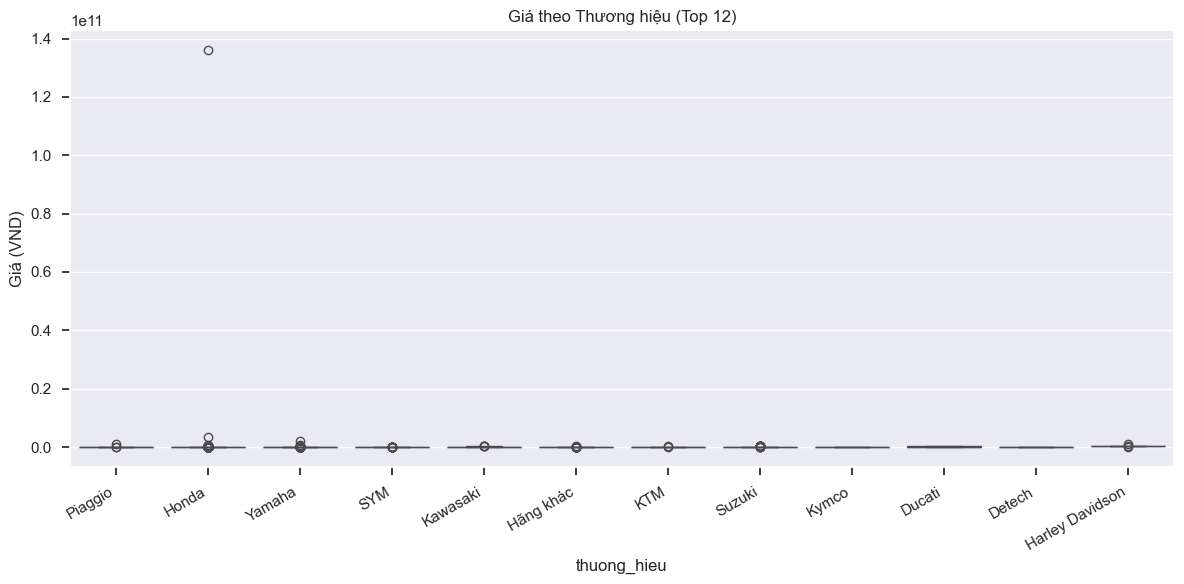

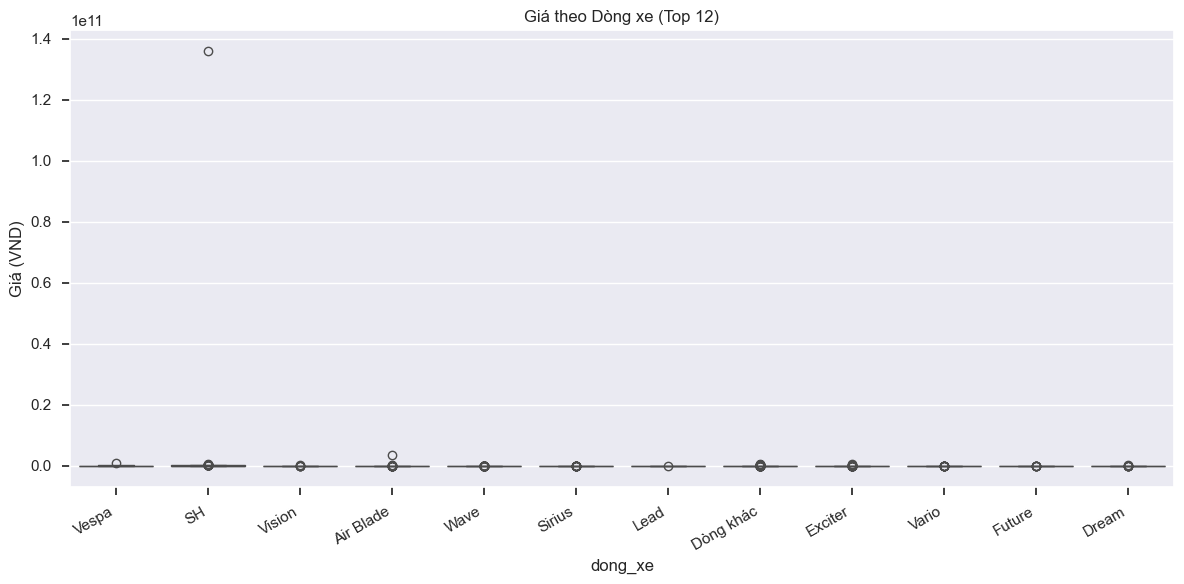

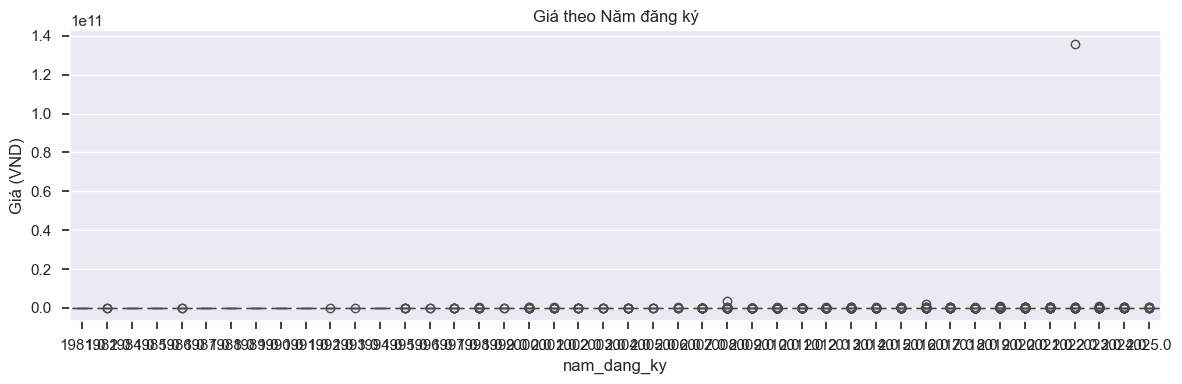

In [8]:
# Boxplots by brand/model/year

# Brand boxplot (top 12)
if 'thuong_hieu' in Df.columns:
    top_brands = Df['thuong_hieu'].value_counts().head(12).index
    plt.figure(figsize=(12,6))
    sns.boxplot(data=Df[Df['thuong_hieu'].isin(top_brands)], x='thuong_hieu', y=price)
    plt.xticks(rotation=30, ha='right')
    plt.ylabel('Giá (VND)')
    plt.title('Giá theo Thương hiệu (Top 12)')
    plt.tight_layout()
    plt.savefig(PLOT_DIR / 'price_box_by_brand.png', dpi=150)
    plt.show()

# Model boxplot (top 12)
if 'dong_xe' in Df.columns:
    top_models = Df['dong_xe'].value_counts().head(12).index
    plt.figure(figsize=(12,6))
    sns.boxplot(data=Df[Df['dong_xe'].isin(top_models)], x='dong_xe', y=price)
    plt.xticks(rotation=30, ha='right')
    plt.ylabel('Giá (VND)')
    plt.title('Giá theo Dòng xe (Top 12)')
    plt.tight_layout()
    plt.savefig(PLOT_DIR / 'price_box_by_model.png', dpi=150)
    plt.show()

# Year boxplot
if 'nam_dang_ky' in Df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(data=Df, x='nam_dang_ky', y=price)
    plt.xticks(rotation=0)
    plt.ylabel('Giá (VND)')
    plt.title('Giá theo Năm đăng ký')
    plt.tight_layout()
    plt.savefig(PLOT_DIR / 'price_box_by_year.png', dpi=150)
    plt.show()


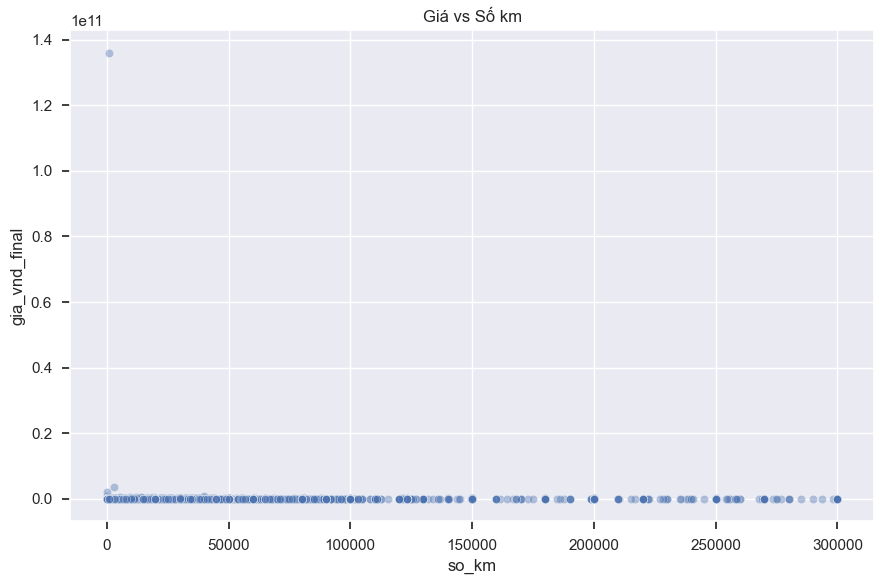

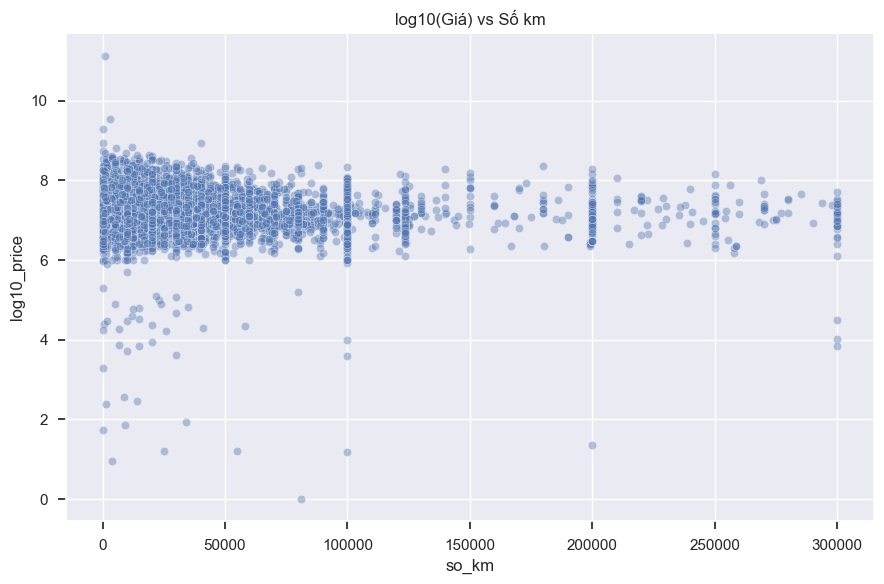

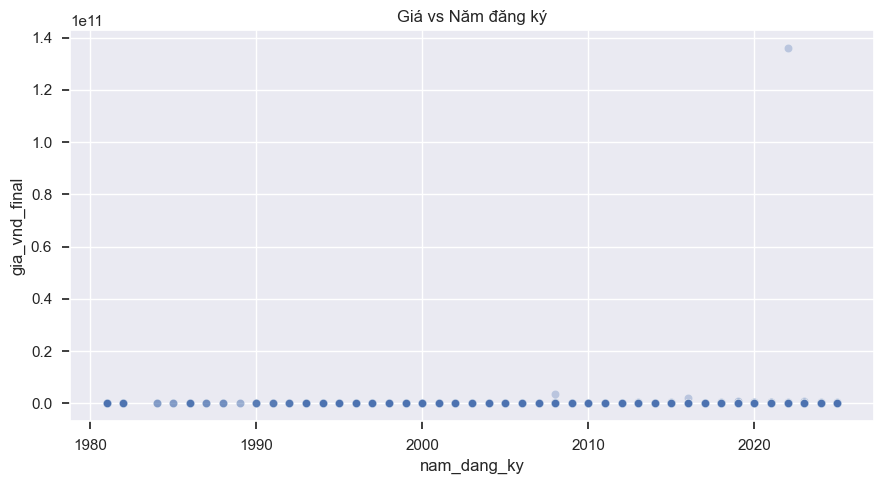

In [9]:
# Scatter price vs km and vs year

# price vs km
if {'so_km', price}.issubset(Df.columns):
    d = Df.dropna(subset=['so_km', price]).copy()
    plt.figure(figsize=(9,6))
    sns.scatterplot(data=d, x='so_km', y=price, alpha=0.4)
    plt.title('Giá vs Số km')
    plt.tight_layout()
    plt.savefig(PLOT_DIR / 'price_vs_km.png', dpi=150)
    plt.show()

    # log-price
    d2 = d[d[price] > 0].copy()
    d2['log10_price'] = np.log10(d2[price])
    plt.figure(figsize=(9,6))
    sns.scatterplot(data=d2, x='so_km', y='log10_price', alpha=0.4)
    plt.title('log10(Giá) vs Số km')
    plt.tight_layout()
    plt.savefig(PLOT_DIR / 'log_price_vs_km.png', dpi=150)
    plt.show()

# price vs year
if {'nam_dang_ky', price}.issubset(Df.columns):
    d = Df.dropna(subset=['nam_dang_ky', price]).copy()
    plt.figure(figsize=(9,5))
    sns.scatterplot(data=d, x='nam_dang_ky', y=price, alpha=0.3)
    plt.title('Giá vs Năm đăng ký')
    plt.tight_layout()
    plt.savefig(PLOT_DIR / 'price_vs_year.png', dpi=150)
    plt.show()


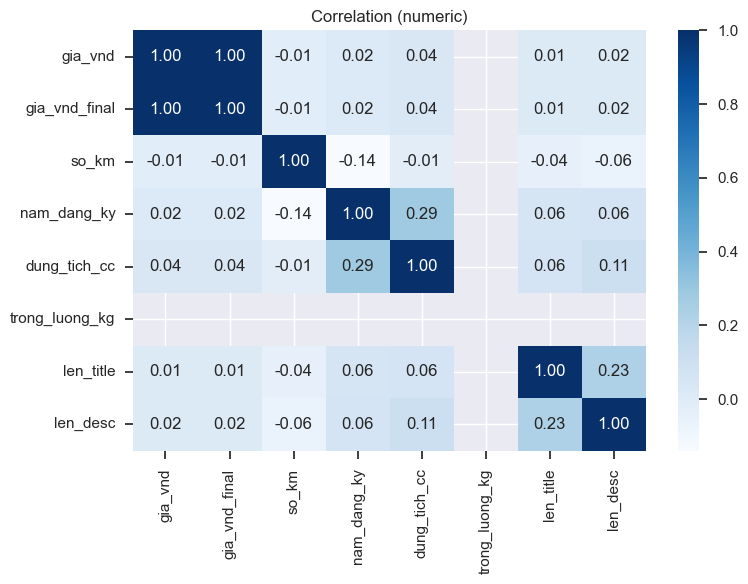

In [10]:
# Correlation heatmap (numeric only)

num_cols = [c for c in ['gia_vnd','gia_vnd_final','so_km','nam_dang_ky','dung_tich_cc','trong_luong_kg','len_title','len_desc'] if c in Df.columns]
if num_cols:
    corr = Df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
    plt.title('Correlation (numeric)')
    plt.tight_layout()
    plt.savefig(PLOT_DIR / 'corr_numeric.png', dpi=150)
    plt.show()
else:
    print('No numeric columns available for correlation.')
